Web Scraping image from google

In [ ]:
pip install requests beautifulsoup4



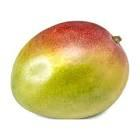
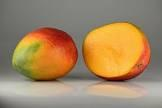
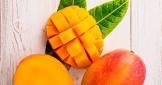
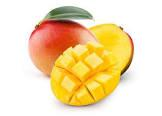
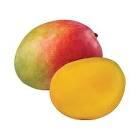

In [1]:
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
import os
import base64
from PIL import Image as PILImage
import io

def fetch_and_display_and_save_images(query, number_of_images):
    base_url = 'https://www.google.com'
    url = f'{base_url}/search?hl=en&q={query}&tbm=isch'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    images = []
    for img in soup.find_all('img'):
        src = img.get('src')
        if src and src.startswith('http'):
            images.append(src)

    # Create a directory for saving images if it doesn't exist
    folder_path = '/content/images_saved'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Prepare HTML for horizontal display and save images
    image_html = ""
    for i, img_url in enumerate(images[:number_of_images]):
        try:
            img_data = requests.get(img_url).content
            img_pil = PILImage.open(io.BytesIO(img_data))
            img_pil.save(f'{folder_path}/{query}_{i+1}.jpg')  # Save the image

            # Convert to Base64 for embedding
            buffered = io.BytesIO()
            img_pil.save(buffered, format="JPEG")
            img_base64 = base64.b64encode(buffered.getvalue()).decode('utf-8')
            image_html += f"<img style='width: 150px; margin: 5px; display: inline-block;' src='data:image/jpeg;base64,{img_base64}' />"
        except Exception as e:
            print(f"Could not process {img_url} - {e}")

    # Display images in the notebook
    display(HTML(image_html))

fetch_and_display_and_save_images('mango', 5)
